[*********************100%***********************]  1 of 1 completed


Data Head:
 Price                      Adj Close      Close       High        Low  \
Ticker                          AAPL       AAPL       AAPL       AAPL   
Date                                                                    
2020-01-02 00:00:00+00:00  72.876099  75.087502  75.150002  73.797501   
2020-01-03 00:00:00+00:00  72.167603  74.357498  75.144997  74.125000   
2020-01-06 00:00:00+00:00  72.742661  74.949997  74.989998  73.187500   
2020-01-07 00:00:00+00:00  72.400536  74.597504  75.224998  74.370003   
2020-01-08 00:00:00+00:00  73.565178  75.797501  76.110001  74.290001   

Price                           Open     Volume  
Ticker                          AAPL       AAPL  
Date                                             
2020-01-02 00:00:00+00:00  74.059998  135480400  
2020-01-03 00:00:00+00:00  74.287498  146322800  
2020-01-06 00:00:00+00:00  73.447502  118387200  
2020-01-07 00:00:00+00:00  74.959999  108872000  
2020-01-08 00:00:00+00:00  74.290001  132079200  
Dat

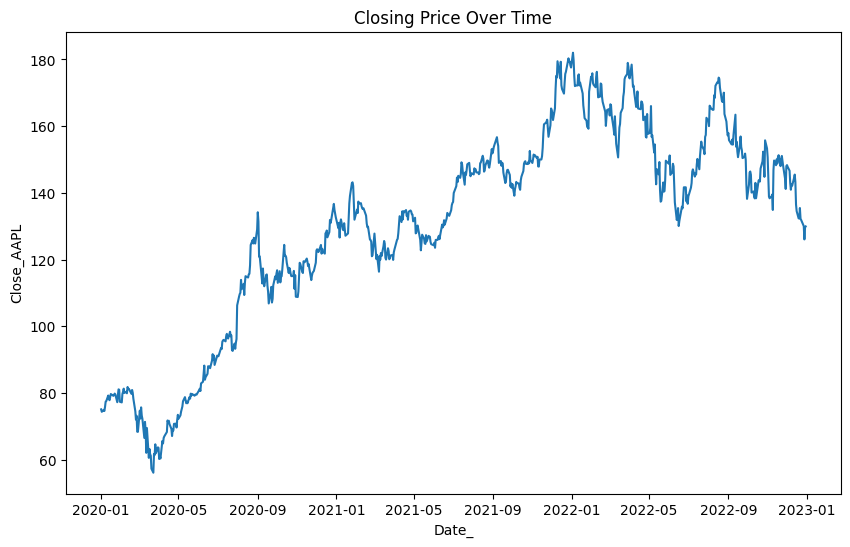

                      Date_   returns
0 2020-01-02 00:00:00+00:00       NaN
1 2020-01-03 00:00:00+00:00 -0.009722
2 2020-01-06 00:00:00+00:00  0.007968
3 2020-01-07 00:00:00+00:00 -0.004703
4 2020-01-08 00:00:00+00:00  0.016086
                       Date_  Close_AAPL     SMA50
0  2020-01-02 00:00:00+00:00   75.087502       NaN
1  2020-01-03 00:00:00+00:00   74.357498       NaN
2  2020-01-06 00:00:00+00:00   74.949997       NaN
3  2020-01-07 00:00:00+00:00   74.597504       NaN
4  2020-01-08 00:00:00+00:00   75.797501       NaN
5  2020-01-09 00:00:00+00:00   77.407501       NaN
6  2020-01-10 00:00:00+00:00   77.582497       NaN
7  2020-01-13 00:00:00+00:00   79.239998       NaN
8  2020-01-14 00:00:00+00:00   78.169998       NaN
9  2020-01-15 00:00:00+00:00   77.834999       NaN
10 2020-01-16 00:00:00+00:00   78.809998       NaN
11 2020-01-17 00:00:00+00:00   79.682503       NaN
12 2020-01-21 00:00:00+00:00   79.142502       NaN
13 2020-01-22 00:00:00+00:00   79.425003       NaN
14 2020

In [26]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fetch historical data for a stock (e.g., Apple)
data = yf.download("AAPL", start="2020-01-01", end="2023-01-01")

# Print the first few rows and column names
print("Data Head:\n", data.head())
print("Data Columns:\n", data.columns)

# Ensure 'Date' is a column
data.reset_index(inplace=True)
print("Data after resetting index:\n", data.head())
print("Data Columns after resetting index:\n", data.columns)

# Flatten the MultiIndex
data.columns = ['_'.join(col).strip() for col in data.columns.values]
print("Flattened Data Columns:\n", data.columns)

# Check data types
print("Data Types:\n", data.dtypes)

# Plotting the closing price
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Date_', y='Close_AAPL')
plt.title("Closing Price Over Time")
plt.show()

# Calculate returns
data['returns'] = data['Close_AAPL'].pct_change()
print(data[['Date_', 'returns']].head())

# Example of backtesting a simple moving average strategy
data['SMA50'] = data['Close_AAPL'].rolling(window=50).mean()
print(data[['Date_', 'Close_AAPL', 'SMA50']].head(60))
